In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

from feature_engine.outlier_removers import Winsorizer

In [2]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [3]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

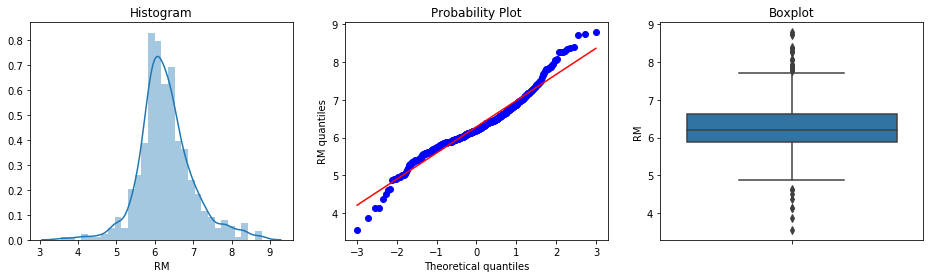

In [4]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

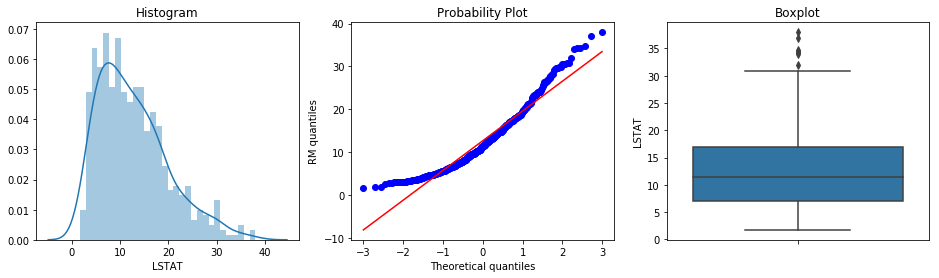

In [5]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

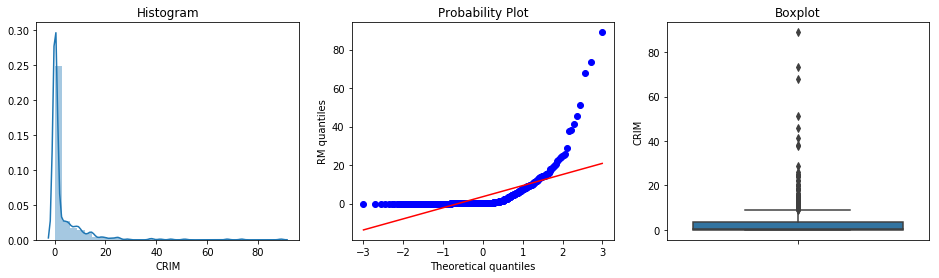

In [6]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

In [7]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [8]:
# Now let's replace the outliers by the percentiles

boston['RM']= winsorise(boston, 'RM', boston['RM'].quantile(0.95), boston['RM'].quantile(0.05))

In [9]:
boston['LSTAT']= winsorise(boston, 'LSTAT', boston['LSTAT'].quantile(0.95), boston['LSTAT'].quantile(0.05))

In [10]:
boston['CRIM']= winsorise(boston, 'CRIM', boston['CRIM'].quantile(0.95), boston['CRIM'].quantile(0.05))

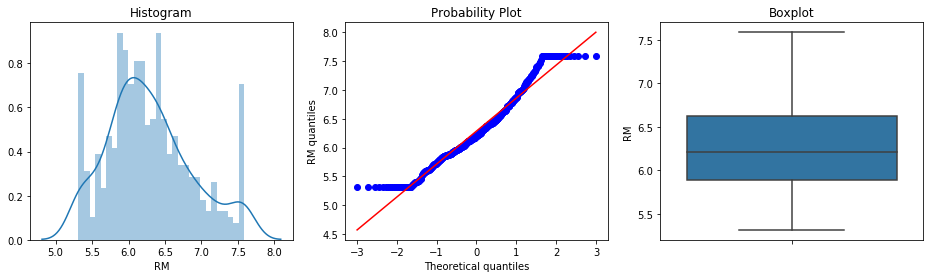

In [11]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

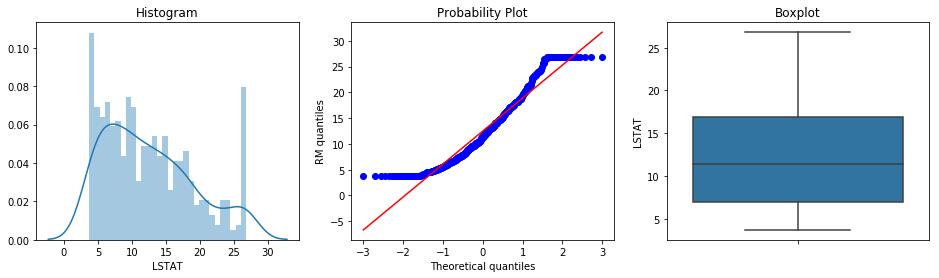

In [12]:
diagnostic_plots(boston, 'LSTAT')

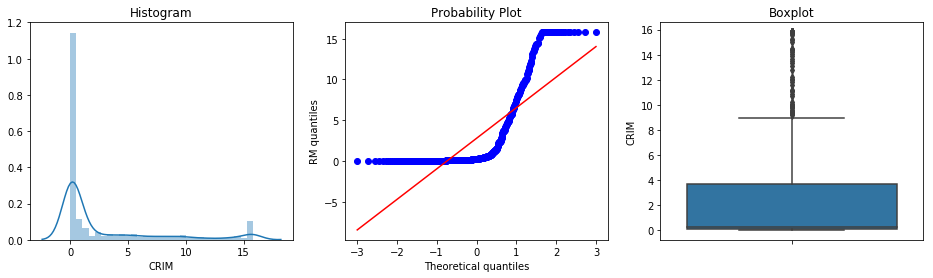

In [13]:
diagnostic_plots(boston, 'CRIM')

## Censoring with feature-engine

In [14]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [15]:
# create the capper

windsorizer = Winsorizer(distribution='quantiles', 
                          tail='both', # cap left, right or both tails 
                          variables=['RM', 'LSTAT', 'CRIM'])

windsorizer.fit(boston)

Winsorizer(distribution='quantiles', fold=3, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [17]:
boston_t = windsorizer.transform(boston)

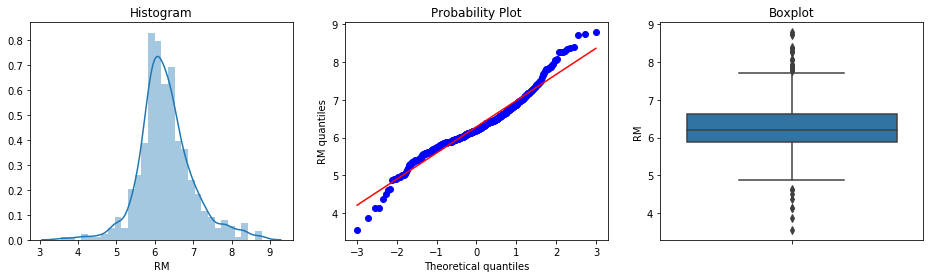

In [18]:
diagnostic_plots(boston, 'RM')

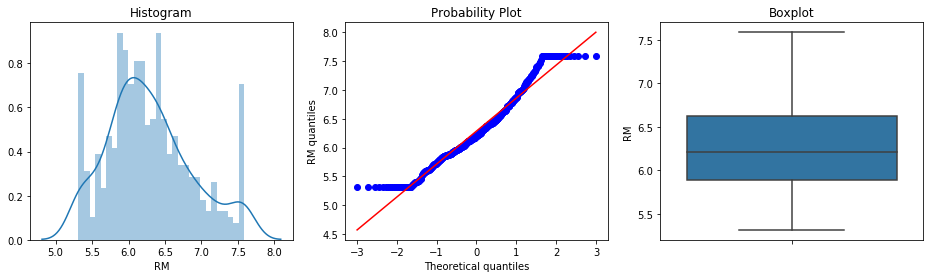

In [19]:
diagnostic_plots(boston_t, 'RM')

In [20]:
# we can inspect the minimum caps for each variable
windsorizer.left_tail_caps_

{'RM': 5.314, 'LSTAT': 3.7075000000000005, 'CRIM': 0.027909999999999997}

In [21]:
# we can inspect the maximum caps for each variable
windsorizer.right_tail_caps_

{'RM': 7.5875, 'LSTAT': 26.8075, 'CRIM': 15.78915}